[Reference](https://medium.com/@francescofranco_39234/principal-component-analysis-with-python-a-deep-dive-0c5195bff087)

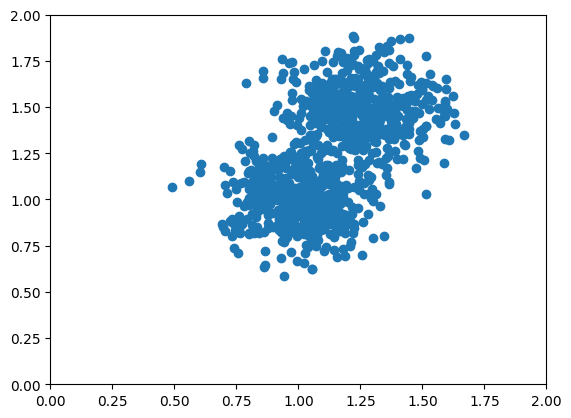

In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

# Configuration options
num_samples_total = 1000
cluster_centers = [(1,1), (1.25,1.5)]
num_classes = len(cluster_centers)

# Generate data
X, y = make_blobs(n_samples = num_samples_total, centers = cluster_centers, n_features = num_classes, center_box=(0, 1), cluster_std = 0.15)

# Make plot
plt.scatter(X[:, 0], X[:, 1])
axes = plt.gca()
axes.set_xlim([0, 2])
axes.set_ylim([0, 2])
plt.show()

(150, 4)
(150,)


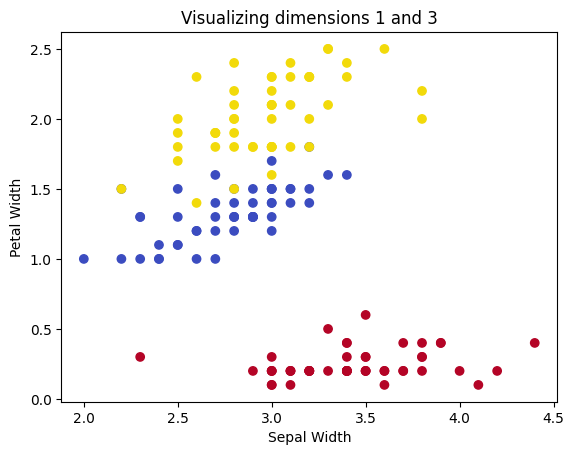

In [3]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

# Configuration options
dimension_one = 1
dimension_two = 3

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Shape
print(X.shape)
print(y.shape)

# Dimension definitions
dimensions = {
  0: 'Sepal Length',
  1: 'Sepal Width',
  2: 'Petal Length',
  3: 'Petal Width'
}

# Color definitions
colors = {
  0: '#b40426',
  1: '#3b4cc0',
  2: '#f2da0a',
}

# Legend definition
legend = ['Iris Setosa', 'Iris Versicolour', 'Iris Virginica']

# Make plot
colors = list(map(lambda x: colors[x], y))
plt.scatter(X[:, dimension_one], X[:, dimension_two], c=colors)
plt.title(f'Visualizing dimensions {dimension_one} and {dimension_two}')
plt.xlabel(dimensions[dimension_one])
plt.ylabel(dimensions[dimension_two])
plt.show()

Old mean/std for dim=0: 5.843333333333334/0.8253012917851409
New mean/std for dim=0: 0.0/1.0
Old mean/std for dim=1: 3.0573333333333337/0.4344109677354946
New mean/std for dim=1: 0.0/0.9999999999999999
Old mean/std for dim=2: 3.7580000000000005/1.759404065775303
New mean/std for dim=2: 0.0/1.0
Old mean/std for dim=3: 1.1993333333333336/0.7596926279021594
New mean/std for dim=3: 0.0/1.0


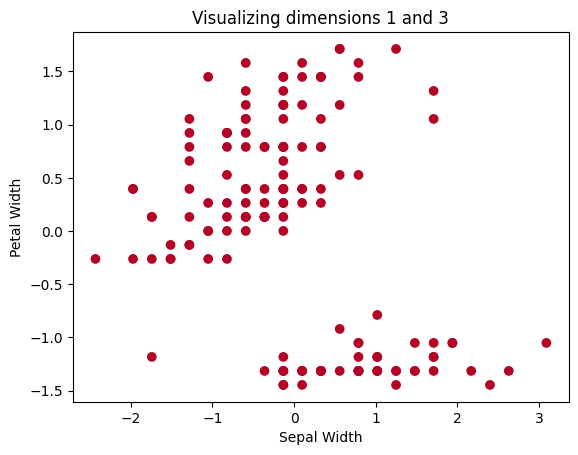

In [4]:
# Perform standardization
for dim in range(0, X.shape[1]):
  print(f'Old mean/std for dim={dim}: {np.average(X[:, dim])}/{np.std(X[:, dim])}')
  X[:, dim] = (X[:, dim] - np.average(X[:, dim])) / np.std(X[:, dim])
  print(f'New mean/std for dim={dim}: {np.abs(np.round(np.average(X[:, dim])))}/{np.std(X[:, dim])}')

# Make plot
colors = list(map(lambda x: colors[x], y))
plt.scatter(X[:, dimension_one], X[:, dimension_two], c=colors)
plt.title(f'Visualizing dimensions {dimension_one} and {dimension_two}')
plt.xlabel(dimensions[dimension_one])
plt.ylabel(dimensions[dimension_two])
plt.show()

In [5]:
# Compute covariance matrix
cov_matrix = np.empty((X.shape[1], X.shape[1])) # 4 x 4 matrix
for row in range(0, X.shape[1]):
  for col in range(0, X.shape[1]):
    cov_matrix[row][col] = np.round(np.average([(X[i, row] - np.average(X[:, row]))*(X[i, col]\
        - np.average(X[:, col])) for i in range(0, X.shape[0])]), 2)

In [6]:
# Compare the matrices
print('Self-computed:')
print(cov_matrix)
print('NumPy-computed:')
print(np.round(np.cov(X.T), 2))

Self-computed:
[[ 1.   -0.12  0.87  0.82]
 [-0.12  1.   -0.43 -0.37]
 [ 0.87 -0.43  1.    0.96]
 [ 0.82 -0.37  0.96  1.  ]]
NumPy-computed:
[[ 1.01 -0.12  0.88  0.82]
 [-0.12  1.01 -0.43 -0.37]
 [ 0.88 -0.43  1.01  0.97]
 [ 0.82 -0.37  0.97  1.01]]


In [8]:
# Compute the eigenpairs
eig_vals, eig_vect = np.linalg.eig(cov_matrix)
print(eig_vect)
print(eig_vals)

[[ 0.52103086 -0.37921152 -0.71988993  0.25784482]
 [-0.27132907 -0.92251432  0.24581197 -0.12216523]
 [ 0.57953987 -0.02547068  0.14583347 -0.80138466]
 [ 0.56483707 -0.06721014  0.63250894  0.52571316]]
[2.91912926 0.91184362 0.144265   0.02476212]


In [9]:
# Compute variance contribution of each vector
contrib_func = np.vectorize(lambda x: x / np.sum(eig_vals))
var_contrib = contrib_func(eig_vals)
print(var_contrib)
print(np.sum(var_contrib))

[0.72978232 0.2279609  0.03606625 0.00619053]
0.9999999999999999


In [10]:
# Sort eigenpairs
eigenpairs = [(np.abs(eig_vals[x]), eig_vect[:,x]) for x in range(0, len(eig_vals))]
eig_vals = [eigenpairs[x][0] for x in range(0, len(eigenpairs))]
eig_vect = [eigenpairs[x][1] for x in range(0, len(eigenpairs))]
print(eig_vals)

[2.919129264835873, 0.9118436180017792, 0.1442649950495815, 0.02476212211276346]


In [11]:
# Build the projection matrix
proj_matrix = np.hstack((eig_vect[0].reshape(4,1), eig_vect[1].reshape(4,1)))
print(proj_matrix)

# Project onto the principal components
X_proj = X.dot(proj_matrix)

[[ 0.52103086 -0.37921152]
 [-0.27132907 -0.92251432]
 [ 0.57953987 -0.02547068]
 [ 0.56483707 -0.06721014]]


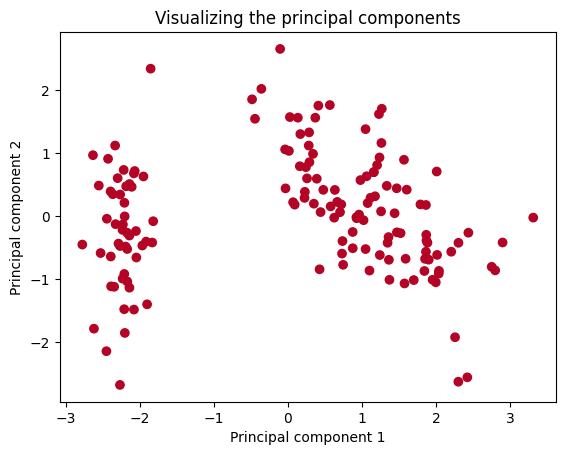

In [12]:
# Make plot of projection
plt.scatter(X_proj[:, 0], X_proj[:, 1], c=colors)
plt.title(f'Visualizing the principal components')
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.show()